In [2]:
list=[]
list.append(0)
list.append(3)
list.append(0)
list.append(3)
list.pop()


3

In [3]:
list= [-4, -2, 0, 2, 4]
d=[]
p=[]

for e in list:
    
    e=2*e
    d.append(abs(e))
    if e>=0:
        p.append(e)
    
d

[8, 4, 0, 4, 8]

In [4]:
list=['  banana    ', 'apple      ', '      carrot']
d=[]
for e in list:

    d.append(e.strip())
d

['banana', 'apple', 'carrot']

1.	Getting summary
a.	Get an overview of the dataset including data types, missing values, and summary statistics (mean, median, min, max, etc.) for numeric columns. 



In [5]:
import pandas as pd
df=pd.read_csv('Retail Sales Dataset_exported.csv')

In [6]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24 00:00:00.000,CUST001,Male,34,Beauty,3.0,50.0,150.0
1,2,2023-02-27 00:00:00.000,CUST002,Female,26,Clothing,2.0,500.0,1000.0
2,3,2023-01-13 00:00:00.000,CUST003,Male,50,Electronics,1.0,30.0,30.0
3,4,2023-05-21 00:00:00.000,CUST004,Male,37,Clothing,1.0,500.0,500.0
4,5,2023-05-06 00:00:00.000,CUST005,Male,30,Beauty,2.0,50.0,100.0


In [7]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1013.000000,1013.000000,1005.000000,1000.000000,1005.000000
mean,507.013820,41.373149,2.519403,179.330000,457.910448
std,292.595854,13.699591,1.132142,189.938748,563.592597
min,1.000000,18.000000,1.000000,25.000000,25.000000
25%,254.000000,29.000000,1.000000,30.000000,60.000000
50%,507.000000,42.000000,3.000000,50.000000,120.000000
75%,760.000000,53.000000,4.000000,300.000000,900.000000
max,1014.000000,64.000000,4.000000,500.000000,2000.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1013 non-null   int64  
 1   Date              1013 non-null   object 
 2   Customer ID       1009 non-null   object 
 3   Gender            1013 non-null   object 
 4   Age               1013 non-null   int64  
 5   Product Category  1011 non-null   object 
 6   Quantity          1005 non-null   float64
 7   Price per Unit    1000 non-null   float64
 8   Total Amount      1005 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 71.4+ KB


In [9]:
df.isnull().sum()

Transaction ID       0
Date                 0
Customer ID          4
Gender               0
Age                  0
Product Category     2
Quantity             8
Price per Unit      13
Total Amount         8
dtype: int64

In [10]:
# 2.	Data Cleaning
# a.	Drop the row whose column =  Customer_ID is Missing
# b.	Add mode value to the row whose Product Category is missing




#a
df_cleaned = df.dropna(subset=['Customer ID'])
help(df.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |
 |  Allowed inputs are:
 |
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - An alignable boolean Series. The index of the key will be aligned before
 |    masking.
 |  - An alignable Index. The Index of the returned selection will be the input.
 |  - A ``callable`` function

In [11]:

df.loc[df['Product Category'].isnull(),'Product Category']=df['Product Category'].mode()[0]
df.isnull().sum()

Transaction ID       0
Date                 0
Customer ID          4
Gender               0
Age                  0
Product Category     0
Quantity             8
Price per Unit      13
Total Amount         8
dtype: int64

In [12]:
# c.	Add values using medium on the row whose Column Quantity and price is missing
df.loc[df['Quantity'].isnull(),'Quantity']=df['Quantity'].median()
df.loc[df['Price per Unit'].isnull(),'Price per Unit']=df['Price per Unit'].median()
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         4
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        8
dtype: int64

In [13]:
# d.	Add values using multiplication of column quantity and price per product if total amount column is empty
df.loc[df['Total Amount'].isnull(),'Total Amount']=df['Quantity']*df['Price per Unit']
df.isnull().sum()


Transaction ID      0
Date                0
Customer ID         4
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [32]:

df['Date'] = df['Date'].apply(lambda x: x[:10])
df.Date


0       2023-11-24
1       2023-02-27
2       2023-01-13
3       2023-05-21
4       2023-05-06
           ...    
1008    2023-10-15
1009    2023-10-03
1010    2023-05-15
1011    2023-10-27
1012    2023-08-08
Name: Date, Length: 1013, dtype: object

3.	Analyze customer age, gender distribution, and visualize in stacked bar chart
4.	Explore popular product categories and average spending. 
5.	Analyze product categories and their popularity.
6.	Investigate the relationship between quantity, price per unit, and total amount for different product categories.
7.	Analyze trends over time using the date column, such as monthly or yearly sales trends.


In [43]:
!pip install matplot


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

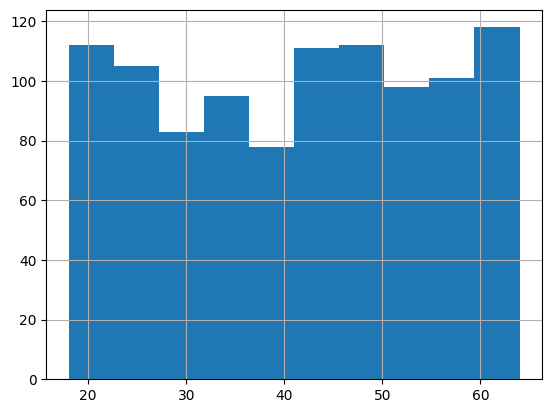

In [54]:
df['Age'].hist()

<Axes: >

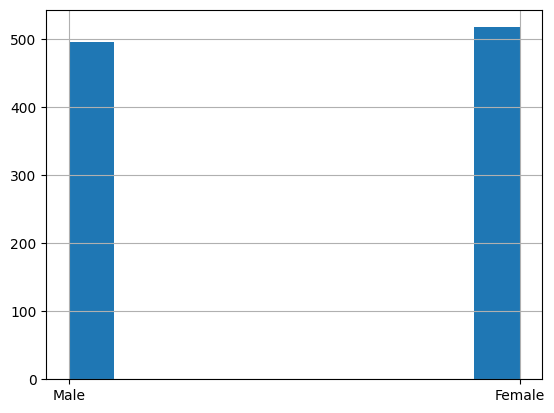

In [51]:
df['Gender'].hist()

In [60]:
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3.0,50.0,150.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2.0,500.0,1000.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1.0,30.0,30.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1.0,500.0,500.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2.0,50.0,100.0


In [76]:
df.groupby('Product Category')['Total Amount'].mean()

Product Category
Beauty         464.935275
Clothing       446.946779
Electronics    461.484150
Name: Total Amount, dtype: float64

<Axes: >

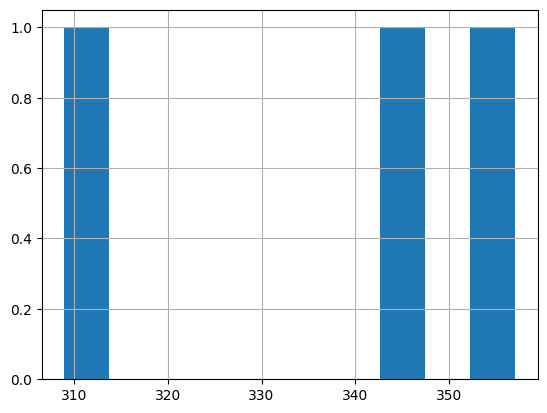

In [81]:
#5.	Analyze product categories and their popularity.#
df['Product Category'].value_counts().hist()

In [87]:
df.groupby('Date')['Product Category']

NameError: name 'plt' is not defined